In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Function to visualize live cells with grids
def visualize_live_cells(csv_file, board_dimensions, view_window=None):
    # Load the live cell coordinates from the CSV file
    data = pd.read_csv(csv_file, header=None, names=["x", "y"])

    # Unpack the board dimensions
    board_width, board_height = board_dimensions

    # Create a blank board with 0's (non-live cells)
    board = np.zeros((board_height, board_width))

    # Mark the live cells
    for _, row in data.iterrows():
        x, y = row["x"], row["y"]
        if (
            0 <= x < board_width and 0 <= y < board_height
        ):  # Ensure the cell is within bounds
            board[y][x] = 1  # Set live cell to 1 (assuming (0, 0) is top-left corner)

    # If a view window is specified, zoom into that area
    if view_window:
        x_min, x_max, y_min, y_max = view_window
        board = board[y_min:y_max, x_min:x_max]

    # Create a plot to visualize the live cells
    plt.figure(figsize=(min(board_width, 10), min(board_height, 10)))

    # Display the board with live cells in black and non-live cells transparent
    plt.imshow(
        board, cmap="Greys", interpolation="none", aspect="equal", vmin=0, vmax=1
    )

    # Add the gridlines
    plt.grid(True, which="both", color="black", linewidth=1)

    # Set the ticks and labels
    if view_window:
        plt.xticks(np.arange(x_max - x_min + 1) - 0.5, np.arange(x_min, x_max + 1))
        plt.yticks(np.arange(y_max - y_min + 1) - 0.5, np.arange(y_min, y_max + 1))
    else:
        plt.xticks(np.arange(board_width + 1) - 0.5, np.arange(board_width + 1))
        plt.yticks(np.arange(board_height + 1) - 0.5, np.arange(board_height + 1))

    # Set the gridlines to appear between the cells
    plt.gca().set_xticks(np.arange(-0.5, board.shape[1], 1), minor=True)
    plt.gca().set_yticks(np.arange(-0.5, board.shape[0], 1), minor=True)

    plt.gca().invert_yaxis()  # Ensure that (0, 0) is at the top-left corner
    plt.grid(True, which="minor", color="black", linestyle="-", linewidth=1)

    plt.title(str(csv_file))
    plt.show()

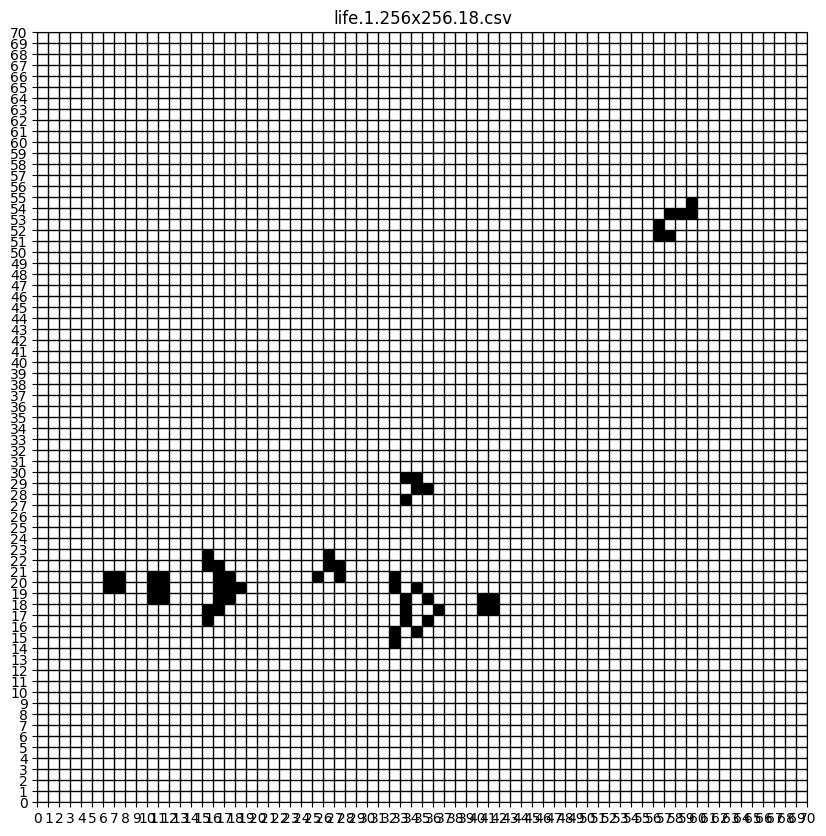

In [22]:
# Example usage
csv_file = "life.1.256x256.18.csv"  # Replace with the path to your CSV file
board_dimensions = (256, 256)  # Set the dimensions of the board (width, height)
visualize_live_cells(csv_file, board_dimensions, (0, 70, 0, 70))

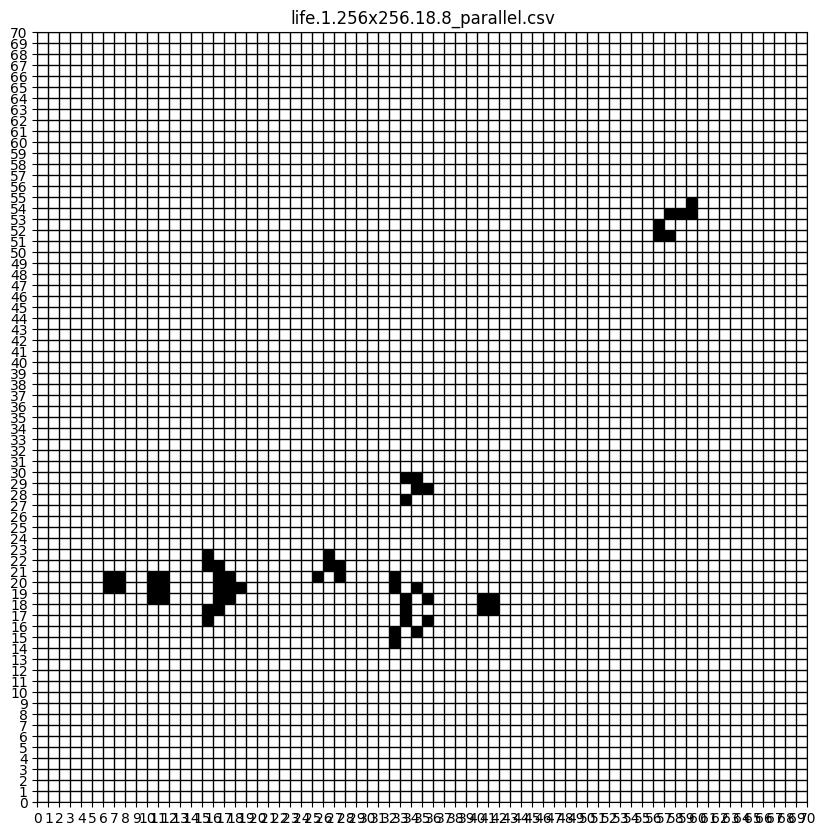

In [23]:
# Example usage
csv_file = "life.1.256x256.18.8_parallel.csv"  # Replace with the path to your CSV file
board_dimensions = (256, 256)  # Set the dimensions of the board (width, height)
visualize_live_cells(csv_file, board_dimensions, (0, 70, 0, 70))

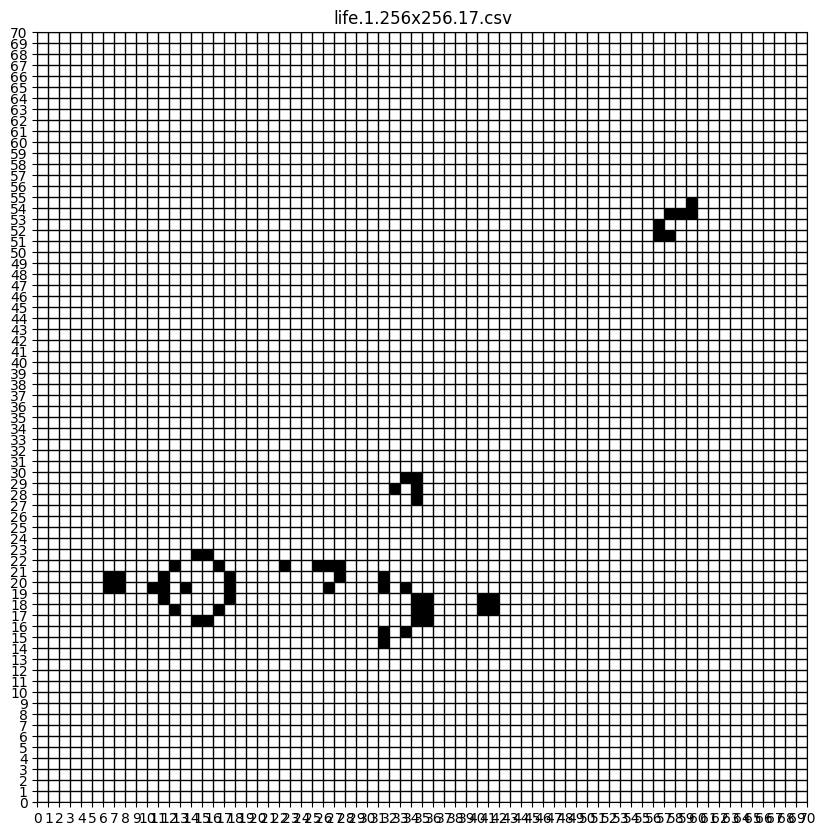

In [24]:
csv_file = "life.1.256x256.17.csv"  # Replace with the path to your CSV file
board_dimensions = (256, 256)  # Set the dimensions of the board (width, height)
visualize_live_cells(csv_file, board_dimensions, (0, 70, 0, 70))